In [27]:
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from scipy.stats import linregress


from pylab import cm
import matplotlib as mpl

import matplotlib.font_manager as fm
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2


In [2]:
def avg_loss_for_dataset(test,test_predictions):
    counter = 0
    summ = 0
    for item in test['Target']:
        loss = abs(item - test_predictions[counter])
        summ += loss 
        counter +=1
    avg_loss = summ/counter
    return avg_loss

In [3]:
dataframe = [[22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 2.0, 6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 5.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 0.9340034219300541], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 1.0, 6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 5.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 0.9340136020101998], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 19.0, 22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 29.0, 6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 13.0, 0.9943792172472191], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 2.0, 6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.7574837317714246], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9756779296007395], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.9525386431300685], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 1.0559522622039295], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 0.9883035981259], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 0.9434070927036398], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.9362603488987743], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.9045448512364781], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 1.0296310257157746], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8779595538516357], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8655385448733618], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8647976508214401], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8767135732721978], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 2.0, 0.9137177608126892], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9326370473352537], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.8675358359382193], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8377740387983066], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8177673490686704], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 2.0, 6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 0.9307153920085003], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8878151696018262], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 5.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 7.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 11.0, 0.9061804079838195], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 6.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 17.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 9.0, 0.9179290401693851], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.8917620884113596], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8028629177266332], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9133331463907018], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 13.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 21.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 6.0, 0.9311661512169893], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9154279313747435], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.898348078029283], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9320754410592164], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9263161438060676], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 3.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 0.9384898900769147], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9149784301703429], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9247185707933508], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8576010813136457], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8631168496354319], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8668880640908347], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.835486235335616], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.8845097082085986], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9400253053108905], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9400253053108905], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.7953662118407869], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8395791199693987], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8424245551535148], [85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762, 2.0, 6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 0.9275060736964306], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 17.0, 6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 6.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 9.0, 0.9195326827592727], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.7875872191000328], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 5.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 9.0, 0.9265270033893525], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 3.0, 88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.8353772363232183], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9660242847110503], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9458983946406392], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8848227526270351], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8897392564331629], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9198984389459055], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 5.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 3.0, 0.8794846502731635], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8451761459181624], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8774354623651981], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.7751032963465104], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8200488921484619], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.8290690899501457], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.8984388656746874], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 2.0, 0.899661929860274], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8749765409033466], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 17.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 6.0, 0.8914468165826678], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8966007208083442], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8749765409033466], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.91006971585693], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.899687099359532], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8452308331517779], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9090319047810728], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.9120380471720976], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.9120380471720976], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9554151652130837], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9224584068197], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9186315307617892], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9186315307617892], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.816688439563872], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8618261081127697], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8459417466879242], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 3.0, 6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 4.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 8.0, 0.8930184864822726], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9335507186323019], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.9197296770504225], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8789021037467676], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8694762209570589], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8348268003712336], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.892842193149339], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9204796082763598], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9454056245321497], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9454056245321497], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8879998923641841], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8879998923641841], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9000644990722281], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8682144260703749], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.8905218753654949], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8682144260703749], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8906925765238679], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.911485371471578], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 6.0, 151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 5.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 9.0, 0.9028121758094054], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8852900101904074], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8942122062319455], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9268691191207066], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8928798419673418], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9318797713481219], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8980954097275266], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9355218162698977], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 168.934222, 2223.0, 9.32, 1818.0, 69, 99.0, 1.25, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8992744553103724], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 168.934222, 2223.0, 9.32, 1818.0, 69, 99.0, 1.25, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9402834096505776], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 3.0, 6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 4.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 4.0, 0.7863019305391588], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8460573806031536], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8504903931273179], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8266544466702207], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 173.0451, 1469.0, 6.9, 1097.0, 70, -1.93, 1.1, 596, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.8949752558186106], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.833562828811211], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 3.0, 138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.818121978046764], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 3.0, 140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.8485620339409919], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 3.0, 140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.8240344553726027], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 3.0, 150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.831367404268846], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 7.0, 151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 4.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 6.0, 0.8250455858450295], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.824722205025341], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 3.0, 157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.824677744848602], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 173.0451, 1469.0, 6.9, 1097.0, 70, -1.93, 1.1, 596, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8108109927075529], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520, 1.0, 173.0451, 1469.0, 6.9, 1097.0, 70, -1.93, 1.1, 596, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8108109927075529], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658, 6.0, 9.01218315, 2742.0, 1.85, 1560.0, 4, -48.0, 1.57, 899, 15.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 8.0, 0.9630204382284009], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 9.01218315, 2742.0, 1.85, 1560.0, 4, -48.0, 1.57, 899, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 12.0, 0.9520596366690729], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9472092115992451], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.9612138420995342], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 1.0, 22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 9.0, 0.9673312470386882], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 3.0, 22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 26.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 48.0, 0.9614793347692053], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 29.0, 22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 48.0, 0.8291667590906934], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 4.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 6.0, 0.9295024018572855], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 10.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 12.0, 0.9328719388317613], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 1.1293691769796566], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 6.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9436584515933648], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 17.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 12.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 29.0, 0.9693960437964172], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 10.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 6.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 0.9455704757372165], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 4.0, 0.8889956718145654], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 2.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 0.9212478022349277], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 10.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 12.0, 0.9321031226105362], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.94681196311135], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9312222689529068], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 6.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 16.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 7.0, 0.8984415664733909], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.9418070332098326], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 5.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 6.0, 0.9005843263161922], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9125352998118373], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9172813290889936], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 8.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 6.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 11.0, 0.8582790148137529], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.8964434966467506], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8743644921587482], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9230689861198971], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 5.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 0.9401485233299832], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 10.0, 151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 12.0, 0.9313888774855732], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 10.0, 173.0451, 1469.0, 6.9, 1097.0, 70, -1.93, 1.1, 596, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 12.0, 0.9322424532589624], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708, 3.0, 22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 4.0, 0.9095671954969837], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.7778810508693164], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 4.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9078381866843418], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8142473884677375], [22.989769282, 1156.09, 0.968, 370.944, 11, 52.867, 0.93, 495, 2.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.9207343218302358], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 0.9689254782723203], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 3.0, 47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 18.0, 0.9798678051750209], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 18.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 0.9819291914052416], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 18.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9867652067379971], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 3.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 18.0, 0.9861713204656277], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9690996027574884], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 5.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 6.0, 0.9484671143357954], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 11.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 12.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 6.0, 0.9815485753073486], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.9583012945232874], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 18.0, 95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652, 2.0, 0.9803386955887928], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 3.0, 180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 18.0, 0.9849160879644209], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 18.0, 183.841, 6203.0, 19.25, 3695.0, 74, 78.76, 2.36, 761, 2.0, 0.9870797163230837], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 6.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 22.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.988085528368], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 3.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 20.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 14.0, 0.982357622720515], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 3.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 18.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 11.0, 0.967962433607226], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 5.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 0.9589243905302618], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 3.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 18.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 11.0, 0.98594314414104], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8658623529570778], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 4.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 3.0, 1.0669158264172587], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.9435246305798662], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 9.0, 0.9507743003911809], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8682159765870894], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8480731131154667], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.950135256220813], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.7931113837534443], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.9192863076454956], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.8888945865357197], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9313113494643628], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 3.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 2.0, 0.9351156912495566], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 2.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.959221110164394], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 3.0, 47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9524328745538716], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 3.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9948626752068691], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 1.0633070715577186], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 7.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9539211096658886], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9856731235646338], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9891834811563567], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 3.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9809786530471496], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 3.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.981642066409583], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.9042491515095036], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9544697844901531], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9348273733284079], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.9522701493653365], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9472950702944366], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.926532774508048], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9472950702944366], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 23.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 7.0, 0.9766484353421945], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 9.0, 0.9269866302820899], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9580841857613102], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.90875776885164], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9526792045483631], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9526792045483631], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 9.0, 0.9191179947521791], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 9.0, 0.9284990644552189], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 23.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 7.0, 0.9790072520173958], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9509893148849176], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.9261520716138215], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.9068128786626466], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 9.0, 0.9206379527902504], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9355251189410625], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 9.0, 0.922853891738906], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9946965261305803], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 9.0, 1.0561470441458929], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.9010774907569399], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 5.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 6.0, 0.950094027824725], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 9.0, 0.9386545127013041], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 5.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 5.0, 0.9668890117710794], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.934293832984356], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 5.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 16.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 5.0, 0.9836658769989332], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 4.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9786658480111681], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9582876587144324], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 1.0927688967567206], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 5.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 13.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 5.0, 0.9712425693494174], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.959950899295811], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 1.0250033171929578], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 1.0250033171929578], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9600310160976284], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.9760551509413594], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 9.0, 0.9410583751876156], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.965008682332611], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 4.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9773080962453163], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9597274957700888], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 9.0, 0.9562309534275862], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 1.0293661119513533], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9842043838291772], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9759637313578269], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 9.0, 0.9417022682724806], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9554689883713128], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 9.0, 0.9350885038744982], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9355468078170991], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 9.0, 0.9391439278091877], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 9.0, 0.9495008280311769], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 9.0, 0.9390071273098923], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 9.0, 0.9375766602483047], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 0.9538119207362731], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 2.0, 0.9335741106068092], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 2.0, 0.957466326328142], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 20.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 19.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 81.0, 0.948104927551086], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 3.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 13.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 30.0, 0.9570612403667902], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 8.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 12.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 61.0, 0.9614960024375118], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9280872232573673], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8980690777852615], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 1.1763453144990554], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9318665335613382], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9526383156058382], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9305757326843302], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9195188766313521], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.930330849854303], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9271518823263626], [168.934222, 2223.0, 9.32, 1818.0, 69, 99.0, 1.25, 589, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.934734294341409], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.9062885632403698], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 0.9459223201032334], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9034950955487266], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8288731765044117], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.876929773817506], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8804365716944748], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9458020903945856], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.9406313542084307], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 0.9435246891117269], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9602868196109547], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9730605752963615], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9891142667946559], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 23.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 4.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 7.0, 0.9789835301432394], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9785982408330147], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9700963179144356], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9589636750044026], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 2.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 3.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9663413864625975], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.893983021080974], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 23.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 4.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 7.0, 0.9463407501642711], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8977628048649968], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 23.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 4.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 7.0, 0.9308747393844153], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9529642852606127], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9464955339093886], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9494649396854241], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.9070935789060794], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8850589943505053], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.9127107852056268], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8850826105860764], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8838224497100575], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8838609311476855], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8745818445959157], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8815532175094476], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8824814928128765], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 2.0, 0.9296507991145371], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 2.0, 0.9558813051912276], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9484652144156561], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 1.0064753065788272], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9776618897269327], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9866740842360779], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9500326412786455], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9854709454142848], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9928107131748276], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9502343194214905], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 1.2262371832604302], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.950042681558411], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9514936576813101], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.9409710880482687], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.939468099571433], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.9448803092931785], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.9450838739110238], [168.934222, 2223.0, 9.32, 1818.0, 69, 99.0, 1.25, 589, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.9501142517016524], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9154372125991619], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9902682193313302], [24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8950626890677987], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 6.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 23.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9935596197378339], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9396982833191629], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9146534744202657], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9146534744202657], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8998286134125725], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9121034660227266], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9212020658779863], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9214157192904583], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9258736097953502], [168.934222, 2223.0, 9.32, 1818.0, 69, 99.0, 1.25, 589, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9279874485962961], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.9983274945892598], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 2.0, 0.9248484730918987], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.8685848366077576], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9515474950536926], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 4.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9383916543244055], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8654237427098771], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8392985546684929], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 23.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 4.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 7.0, 0.9011132073221316], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8054697647646359], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8375365497820098], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8229699620064012], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8774043782535557], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 0.9843860827965031], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 0.9684786296675892], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 0.9433021625963626], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 3.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 5.0, 0.8645924817818341], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.9236437926805591], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 24.305, 1363.0, 1.738, 923.0, 12, -40.0, 1.31, 737, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.8915660891186626], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.985020801381283], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 10.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9762485968459982], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 0.9653709197452679], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 9.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9466138192398509], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9400696204006971], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 9.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9672639568663688], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9498764780690071], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9553258966802168], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 2.0, 0.9502287815226828], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9485005049597895], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8626399091039176], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.838440869299331], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 2.0, 0.9512020649357641], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 17.0, 0.9448766408925274], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.7839356399834541], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8149534970853418], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.867230282897116], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 6.0, 0.8799061134068683], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 0.9528263723899224], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 4.0, 0.9388876270337633], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9062582832548894], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.8861981045467096], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 7.0, 0.9130378412162371], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9198408444627938], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 7.0, 0.9104539511115055], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9186481044865438], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 7.0, 0.8801958266016944], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 7.0, 0.8932925418028844], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8195466776381881], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 2.0, 0.9280061399956683], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 7.0, 0.9187646354603005], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 7.0, 0.8792671014443402], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.860639477670445], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8803540434549131], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.940034277556095], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.8981756587025778], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 7.0, 0.9301166619689925], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.889369253349728], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 7.0, 0.9203575882058772], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9639790997852461], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 2.0, 47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.9843660898954848], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 7.0, 0.928775320526338], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 7.0, 0.8946088271370507], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 7.0, 0.9081136040282447], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 7.0, 0.938176061606942], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 7.0, 0.8957671085627404], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8596751558023124], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 7.0, 0.8823395026782954], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.9148711894948446], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9236490903594817], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 0.9704968422525435], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 0.9691765984055732], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 0.9723523554750181], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 6.0, 47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 0.9596408474545743], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 1.0, 0.9452032480235373], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9750873438441808], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.915430368550605], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9170682924897364], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 0.973320371467207], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 0.9720086791875606], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 0.9751664633709555], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 0.9750622658546407], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 0.9697051215407304], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9691199568824432], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9487749242294434], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9397988020540595], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9999758418444775], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 4.0, 0.9661601876598622], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 4.0, 0.9705342748035112], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9821055130292585], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9801528229337517], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9785076482334881], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.981825464860641], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 4.0, 0.966155689758843], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 1.0197825356917836], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9816156784689063], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 4.0, 0.9675712678954936], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 1.0075355808367843], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 4.0, 0.9712081969327925], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 4.0, 0.9709420822101015], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 4.0, 0.9664525997662585], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 4.0, 0.9664697919816038], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 4.0, 0.9672024855380691], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9826581468239702], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9639083884468654], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9569792613673582], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.921062373804408], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 31.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9696383005422264], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9036551781143568], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9657203518176698], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 0.9519174228918035], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.832543970666185], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.848969132073888], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9406568767461254], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.9341237905984819], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.9333836400936907], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 0.9593291882790272], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 0.9564461874468586], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 2.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 12.0, 0.9635444678835585], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9191966468304628], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9795850384153416], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9588738845043241], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 14.0, 1.0203400797418862], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 4.0, 0.93783605844879], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 10.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9528454156776788], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 0.9690963794115354], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652, 1.0, 0.9676688092235657], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 9.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9559234818179326], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 4.0, 0.9437322931613459], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9451522223868531], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 10.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.953630842423569], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 4.0, 0.9417533739903456], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 15.0, 0.9952252360760372], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 4.0, 0.9424104950662644], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 15.0, 0.9923940754471572], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 15.0, 0.98833421962798], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 4.0, 0.9477300799303948], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9479878158171701], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 15.0, 0.9829178730527139], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 5.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 12.0, 0.9624683313090158], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 4.0, 0.9381530526187978], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 14.0, 0.9784649822547086], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 4.0, 0.9377770473291558], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 4.0, 0.9382552924827497], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 14.0, 0.9795268174398533], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9552177624532505], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 9.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9428829263901395], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 15.0, 0.9905082007279532], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 14.0, 0.9754618385265926], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9250487781348327], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 9.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 3.0, 0.9219427439448085], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9645679333052335], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9183753456170718], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 7.0, 0.9235493172483286], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9401791684918129], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9082943421404204], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 7.0, 0.9272269891120632], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9292236012416836], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9307507218301042], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9372619311314008], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 20.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9778692437354298], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 15.0, 0.9625315215056135], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.948475832718655], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 14.0, 0.9684647538292858], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9638827196497775], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 15.0, 0.9738826986592898], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9360030159780907], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9638827196497775], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 7.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 6.0, 0.9484705894367537], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9316628929505899], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 19.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 6.0, 0.9312156084736996], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9534347004124877], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 7.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 6.0, 0.9366707427740096], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 9.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 3.0, 0.923390435837912], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.926378933021739], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9333527397039999], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 9.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9437412865168539], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9428812123809704], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9421934573204718], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9378318445597561], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 9.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9490202253088912], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.90946836016189], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9168438661105703], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 6.0, 0.8949737735238766], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9074789509917939], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.8959192907411375], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 23.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 6.0, 0.927795944650683], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9241724776904499], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.8982612226305925], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.9420769663867898], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 5.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9152279454785349], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 7.0, 0.9120022421528529], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9097922827506602], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.924573550191836], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 9.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.947317092334785], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9095079668318236], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.8917740404281844], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9215936082735098], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9479827211934094], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 5.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9102178428952711], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 5.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9164036606800688], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9208203932622331], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9297340556869984], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9081261104582034], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 23.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 6.0, 0.9319013468858], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 5.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9117581108092149], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9039359670263065], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.925375057332243], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9241512272751771], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9365354381181508], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.8995996277942562], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9135220542634634], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.8947975671651338], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9082748982494359], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9240754886425907], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 6.0, 0.9053104756787869], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 8.0, 0.9066200936680355], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 23.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 6.0, 0.9276799760388704], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.92226064418131], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9071962566508557], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 6.0, 0.892931963157244], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9081197121444179], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 9.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9219829695156466], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 1.1219900605997635], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9090341641517464], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 6.0, 0.893525983459548], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9153115226017512], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 8.0, 0.8894058406181923], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9249164393078739], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9092686559569516], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9066288463463158], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 8.0, 0.8949924810948126], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9055424054816079], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9105169566359713], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 6.0, 0.8887581520094174], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9247784190140513], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9268104387128862], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9084285913319755], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 6.0, 0.8906581828151532], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9219370222951728], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 9.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9232040453139936], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9119127213455667], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 8.0, 0.8965145340354265], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.8968985742357592], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 1.0187330827607324], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9491373923598109], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 16.0, 0.9297234750590336], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9360229037115033], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9410211709240834], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 2.0, 1.0654348213463842], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.8686607102644543], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.7628316264622054], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9319745800832446], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9535473079915661], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9509172407672161], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9437315070103268], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9320432212569724], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9486546220129008], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 1.0476546769858643], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9283358432483229], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9263552112373374], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9463905069932692], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 9.0, 0.9322210889571875], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9355842782347604], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9481538633988147], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9511191229918551], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9280291628658683], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9486492294954967], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9341932799516469], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 16.0, 0.9221430059817224], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9493447761593453], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9295723337467062], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9272158696389308], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9503475676740112], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 16.0, 0.9195249266511858], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 16.0, 0.9212613163196406], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9512384051264118], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9289674523353938], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 0.9327264529766809], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 2.0, 0.9299037607217242], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 2.0, 0.9451685227195198], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 2.0, 0.930483139282939], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 2.0, 0.9333166711223151], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 0.9324698439965291], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 0.9357246415913091], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 0.9373335436108194], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9474774823878176], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9329733154896057], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9446476716888802], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.937650160550822], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.93387081512396], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9407499712611576], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 5.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 4.0, 0.8609073400621383], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 11.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 0.9587746531115292], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 11.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 0.9367731405759661], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.921785021465456], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.8493086451231259], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.8692772451655956], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 2.0, 0.9891435081841425], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 5.0, 0.7765209230912259], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8634831977650926], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 1.2571555255054832], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8634831977650926], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 183.841, 6203.0, 19.25, 3695.0, 74, 78.76, 2.36, 761, 4.0, 0.9664340732951474], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8186067786717722], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8719165754273224], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 15.0, 0.951050155558585], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 7.0, 0.9171069442263735], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 7.0, 0.885328232851729], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 7.0, 0.8945773866470996], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8573438666358455], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 0.9329128844185023], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 7.0, 0.8856899682518988], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8482089826243047], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8482089826243047], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.9291774671843963], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 7.0, 0.870231710799358], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.9362580229009759], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 3.0, 0.9583490065509993], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 2.0, 0.9045742340906461], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652, 4.0, 0.9592625689554718], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652, 4.0, 0.9612968756279427], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652, 4.0, 0.960578803961975], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652, 2.0, 0.9504751845796099], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652, 4.0, 0.9615358086260086], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 3.0, 0.9454072095129804], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 12.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 4.0, 0.9168729900549877], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9235779739026782], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 15.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 3.0, 0.9316781252857885], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 10.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 2.0, 0.9332464126551444], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 2.0, 0.9344038296688983], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 10.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 2.0, 0.9316256038106949], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 3.0, 0.9505627678666682], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 10.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 2.0, 0.9304463707059166], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 12.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 4.0, 0.9117520616100823], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 7.0, 0.8898922607017745], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8807690453278839], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8529370266279944], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 7.0, 0.9013734433979731], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8496686958380727], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8622999224263161], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8732472679376109], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8886287807554305], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8886287807554305], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8684407205756896], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8541456882396696], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8743612524233211], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8294677462311593], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.849081630201119], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8505179274335439], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8011771196469106], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8697394526524398], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8609672309764768], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.858324206359533], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8592784651962198], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8644571256680212], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8604226780270553], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8646488741741821], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8646488741741821], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 3.0, 0.9236126679938388], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9343301679639696], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 2.0, 0.9324355282238895], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9183440948820107], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 5.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9481864877323286], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 4.0, 0.8236245577413656], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 5.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.9494530246379889], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 7.0, 0.9316116262223029], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.8129906134891011], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8479134049874105], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8479134049874105], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9500021348654538], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 7.0, 0.877123311428047], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.9082992798360567], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.9435531532317978], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 6.0, 180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 0.965824817899659], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 183.841, 6203.0, 19.25, 3695.0, 74, 78.76, 2.36, 761, 4.0, 0.9656968910530166], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 183.841, 6203.0, 19.25, 3695.0, 74, 78.76, 2.36, 761, 4.0, 0.9674150933717757], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 183.841, 6203.0, 19.25, 3695.0, 74, 78.76, 2.36, 761, 4.0, 0.9667119440323164], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 183.841, 6203.0, 19.25, 3695.0, 74, 78.76, 2.36, 761, 4.0, 0.9668696674130158], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 6.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 43.0, 183.841, 6203.0, 19.25, 3695.0, 74, 78.76, 2.36, 761, 4.0, 0.9676232138393605], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.8990794007935411], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 9.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 3.0, 0.9825461991379282], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8328999094178292], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 16.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 9.0, 0.8339636752590904], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8524223654811424], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 6.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 4.0, 0.827242908032013], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8795539222708475], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.8011965712388125], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 5.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.8352968455835301], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.832028240282395], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.7993315014554829], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8267199615916044], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8193588707820296], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8135951426702203], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.819276487010441], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 24.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 9.0, 0.8633053309280717], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.906065071581034], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.883484795060999], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9112560962497507], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.924810078295535], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.8834642838313875], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9112560962497507], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9222805553381783], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.9175972999240709], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.8645172141964419], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8814280369715718], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.859047946501374], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.9139277975235796], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.8506014100856758], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.9177254276778771], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.8690578781250058], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8787447873352245], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.872678593665895], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 6.0, 0.8456071167224279], [151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8836525021020104], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.9170101376379286], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8752732727164124], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.9194628632614257], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.872200556283805], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.9196621625391156], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8771525864099877], [167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 7.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.9212548608254763], [157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 15.0, 0.9777000995574395], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.9999664835348749], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 9.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9869976868603221], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 9.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9754028800248353], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 34.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 20.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 85.0, 0.9681531299818198], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 8.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 10.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 0.943151736089973], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 4.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 8.0, 0.8004726699396949], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 2.0, 85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 1.1004712944663655], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 2.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 7.0, 0.9490047544046435], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9233735928644988], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 14.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 21.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 9.0, 0.9502161466721615], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.9269694552207067], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 6.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 8.0, 0.946255649696464], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 4.0, 0.8835744703757485], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 5.0, 0.818015543625637], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 6.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 4.0, 0.9206881252085506], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 5.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 8.0, 0.9299088327455356], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 11.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 6.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 9.0, 0.8821831745838031], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 23.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 9.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 12.0, 0.8658488288409721], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 12.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 21.0, 0.8116236514692694], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.9076604129426866], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9058604033231361], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 4.0, 0.8999069501932428], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 6.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 4.0, 0.9319444525996118], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8843793153573525], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 5.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 3.0, 0.8582186735286275], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708, 1.0, 39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 1.0980449571506563], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708, 5.0, 39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 3.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 18.0, 0.9425826896646712], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 3.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 5.0, 0.8099375451647387], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 3.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 5.0, 0.8041812700642244], [39.09831, 1032.0, 0.862, 336.7, 19, 48.383, 0.82, 418, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.766671244597875], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9535822510328306], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 5.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 3.0, 0.9426116203042051], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 1.1614942202362628], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 21.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 4.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 18.0, 0.8494098783641677], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 9.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 4.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 9.0, 0.8855274251871158], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.9340522856187179], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 5.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 3.0, 0.9717259079074667], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 4.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 13.0, 0.943144531970476], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 21.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 36.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9350531228076286], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9074088255151501], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.8946804703936374], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.8976505065133699], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.893058769664814], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 8.0, 0.9308773689487805], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9419611263939859], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9217212480995367], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 7.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 13.0, 0.9052298459355622], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9055778233425699], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9300863897279336], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 5.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9598802939292124], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9403353841988631], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9310216830138839], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9208811064232271], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8993276974284362], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 8.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 0.921447764262687], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 9.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 0.9596416681846297], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 6.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 7.0, 0.8978962406410479], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8667594056698281], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 6.0, 0.9503725723845043], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8978172473057878], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8978172473057878], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.9248279990725952], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 9.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 4.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 9.0, 0.8475901539343079], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.8718073384029255], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8520631822231599], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8195325234890155], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9140877934685593], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 2.0, 0.8823642479347787], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.7922687946496481], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.8181544953931841], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.7681312719041252], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8388819612345698], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.8144328755451533], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9898720966443032], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.891054181244319], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.916369630870226], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8779301645614348], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 13.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 4.0, 0.8964204369131575], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.864093289613021], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8131592119428824], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8483764619495748], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8317122935057942], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8235193595641387], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8396100655503815], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8640866999021266], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8281215402329639], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.9097088182340017], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8596210726977177], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8215259287773365], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.8396822116675703], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 8.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 4.0, 0.8307557223527113], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.83530559794731], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.83530559794731], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9158623606987989], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.7912178857473989], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.7722163120180864], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 8.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 4.0, 0.8364443556931239], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 4.0, 0.8095356104148015], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8192429793249284], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.908126966630521], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 9.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 4.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 9.0, 0.8434966410560972], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9098110613886442], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.932418710429424], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8054850208947739], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.7828015950886599], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8444935089587923], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.8726208336499917], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8818462187082852], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8416073039277105], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 4.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 10.0, 0.803538613063243], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.8114891282600932], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8842505009306704], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 0.892840089048716], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.886714453605581], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 13.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 4.0, 0.9137958378886577], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 5.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.8350777119038246], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.7915066657227755], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8343349119479393], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8343349119479393], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 1.0, 0.8983060937082292], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 1.0, 0.8983060937082292], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.8869058365417675], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.8143766766359907], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.801235440553513], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.801235440553513], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.906781959140522], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9317206722710176], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9356183128686119], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 3.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 6.0, 0.9377047732148869], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 6.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 6.0, 0.9746410121770669], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 6.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9309654146093926], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 6.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 6.0, 0.9387609899595073], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 6.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 6.0, 0.9794866806116209], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 5.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9344185067042624], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 5.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 6.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 18.0, 0.9438170040991483], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9233417786070756], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9213962419619737], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.8837625728389624], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.8883900678361633], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.895742994970826], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9090850694411443], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9064362222453705], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 5.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9461335126357422], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8954333149763495], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.889894951537628], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.889894951537628], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8864864278498904], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8950714316448688], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8762560347281344], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8705663687559725], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9160856651644137], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9287426625673021], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9327541808147533], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9229098058365712], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.940430970102106], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8527791626532731], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8029910425925034], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 40.0, 95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652, 8.0, 0.9732377239927941], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 16.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 7.0, 0.9157423083474536], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 16.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 7.0, 0.8782157123433479], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8125141741584493], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8540938477882217], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 16.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 7.0, 0.9363028626637155], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 16.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 7.0, 0.8905276598988043], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8105726382221494], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 5.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.8989672974887374], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8319149115159588], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8489563759677671], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.810362407765476], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 2.0, 0.9188894085093265], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.7884325701981741], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8306517224809173], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.8540038265579948], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8182481424032887], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8182481424032887], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8182481424032887], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.799044744328772], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.8615813957206591], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.8604868684641195], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 3.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 5.0, 0.8458731856269807], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 4.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.963170265796035], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9400901950608194], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9544212985055249], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 1.0727887498534117], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 4.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.9599365195774765], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9045351945832549], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 16.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 7.0, 0.9372247851452412], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 1.0462237512881174], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.961448638539996], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 4.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.9560303355082761], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9149515544017375], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.8923656677849301], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9085602665390718], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 4.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9352705609466444], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 16.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 7.0, 0.9267769948937006], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 9.0, 0.8918671303741106], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9320043512136305], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9324327954376805], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 1.0274509336079884], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 1.0274509336079884], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 1.0274509336079884], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9129862184799507], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.9593157850706753], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9757613723368852], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9604547819259793], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 2.0, 1.0520556702666108], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9283736473408901], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 3.0, 47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9429572674087453], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9331744604799044], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 16.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 7.0, 0.940508968355027], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 16.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 7.0, 0.9035259190079398], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.970614832502198], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 16.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 7.0, 0.9629462954964607], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 16.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 7.0, 0.9167856575233552], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 16.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 7.0, 0.9021715520365938], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8575428145151057], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.9256400367132476], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 2.0, 1.032186631588716], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 2.0, 1.0128941578607324], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.9351451173722608], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8542585573597768], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9557020163125683], [50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9399586439194353], [50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9995266324703193], [50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9297724388248158], [50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9783839217108224], [50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9283810638487383], [50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9701604089404032], [50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 3.0, 0.9569487174732068], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9392910821361835], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 3.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9388875991343913], [50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9772848876350055], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9469883279388109], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 3.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 6.0, 0.9427824057966246], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 3.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9457662500447666], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 6.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 6.0, 0.961524197093416], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 2.0, 50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 3.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.965826574711178], [50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.9087450236855876], [50.94151, 3680.0, 6.0, 2183.0, 23, 50.911, 1.63, 650, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.9087450236855876], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 1.0163881165904982], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 2.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 15.0, 1.0440783812768184], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9718946488204578], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 1.048793157119595], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.9482887173422273], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 89.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 4.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 10.0, 0.9808465423998507], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 3.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 6.0, 0.9419894186561873], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 3.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9526175268979092], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 3.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 6.0, 0.9502275587537907], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9571118066561451], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.9223813040481975], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 1.0398395117877757], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 5.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 3.0, 0.9567715489503469], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 6.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 14.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 9.0, 1.0126753350633524], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 8.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 4.0, 1.0002372685897671], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9406734468215412], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9791444415166182], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9979877471794956], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 1.0482634606872814], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 1.0266816685707016], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9692054440851012], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 2.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 12.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 5.0, 1.0175761324024701], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9259714655348487], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9259714655348487], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9259714655348487], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9259714655348487], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.9299821102983633], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9748573344890458], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9507009883957632], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 5.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 4.0, 1.0449719971870233], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9958849108138025], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.9332215245002043], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 6.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 16.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 7.0, 1.0092545760019038], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 1.0251334557885665], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 1.0183073267020581], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 1.025261384188621], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 3.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 4.0, 1.0637930177960306], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 8.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 14.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 27.0, 0.9753359615912737], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 3.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 6.0, 0.9400512445548376], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.94667984819002], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 3.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 6.0, 0.949751931120633], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9877655475468076], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9877655475468076], [85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 1.0077148888337082], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.956099071515926], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.9139651859469782], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 14.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 11.0, 0.8112925991963581], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 6.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 6.0, 0.9722668281860699], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9623377089421824], [88.905842, 3203.0, 4.472, 1799.0, 39, 29.6, 1.22, 549, 3.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 5.0, 0.8744304767523731], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 6.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 6.0, 0.9793593829601163], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 1.0158750736394957], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.8724643457918276], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.9611734979625884], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8757710295973273], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.874503615257463], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9737329106193087], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 6.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 6.0, 0.9857324056941413], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 183.841, 6203.0, 19.25, 3695.0, 74, 78.76, 2.36, 761, 1.0, 1.0273777198699743], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 1.1746272014123016], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9097680713305957], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9097680713305957], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 1.1872202096168385], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 6.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 6.0, 0.9768854602469825], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 3.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 4.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 0.9528767103283751], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 6.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 6.0, 0.9740026273146909], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 1.0114373850216056], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 1.0141753829439897], [137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.9493420182110963], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 5.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 3.0, 0.9588651563413374], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 3.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 5.0, 0.9086073616449745], [140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 3.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 5.0, 0.912877038773464], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 3.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 5.0, 0.9236140632619512], [144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 3.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 5.0, 0.9090329788747169]]

In [4]:
df = pd.DataFrame(dataframe, columns = ['Atomic_Mass_1','Boil_1','Density_1','Melt_1','Number_1','Electron_Affinity_1','Electronegativity_Pauling_1','First_Ionization_Energy_1','Weight_1',    'Atomic_Mass_2','Boil_2','Density_2','Melt_2','Number_2','Electron_Affinity_2','Electronegativity_Pauling_2','First_Ionization_Energy_2','Weight_2',    'Atomic_Mass_3','Boil_3','Density_3','Melt_3','Number_3','Electron_Affinity_3','Electronegativity_Pauling_3','First_Ionization_Energy_3','Weight_3','Target'])           

In [5]:
print(df)

      Atomic_Mass_1   Boil_1  Density_1    Melt_1  Number_1  \
0         22.989769  1156.09      0.968   370.944        11   
1         22.989769  1156.09      0.968   370.944        11   
2        137.327700  2118.00      3.510  1000.000        56   
3         22.989769  1156.09      0.968   370.944        11   
4          6.940000  1603.00      0.534   453.650         3   
...             ...      ...        ...       ...       ...   
1061     138.905477  3737.00      6.162  1193.000        57   
1062     138.905477  3737.00      6.162  1193.000        57   
1063     140.116100  3716.00      6.770  1068.000        58   
1064     140.907662  3403.00      6.770  1208.000        59   
1065     144.242300  3347.00      7.010  1297.000        60   

      Electron_Affinity_1  Electronegativity_Pauling_1  \
0                 52.8670                         0.93   
1                 52.8670                         0.93   
2                 13.9540                         0.89   
3          

In [6]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])


In [7]:
train.drop(columns = ['Melt_1','Melt_2','Melt_3','Atomic_Mass_2','Atomic_Mass_3','Atomic_Mass_1','Boil_2','Boil_3','Boil_1','First_Ionization_Energy_1','Electron_Affinity_1','Electronegativity_Pauling_1','Weight_1','First_Ionization_Energy_2','Electron_Affinity_2','Electronegativity_Pauling_2','Weight_2','First_Ionization_Energy_3','Electron_Affinity_3','Electronegativity_Pauling_3','Weight_3'])
val.drop(columns = ['Melt_1','Melt_2','Melt_3','Atomic_Mass_2','Atomic_Mass_3','Atomic_Mass_1','Boil_2','Boil_3','Boil_1','First_Ionization_Energy_1','Electron_Affinity_1','Electronegativity_Pauling_1','Weight_1','First_Ionization_Energy_2','Electron_Affinity_2','Electronegativity_Pauling_2','Weight_2','First_Ionization_Energy_3','Electron_Affinity_3','Electronegativity_Pauling_3','Weight_3'])
test.drop(columns = ['Melt_1','Melt_2','Melt_3','Atomic_Mass_2','Atomic_Mass_3','Atomic_Mass_1','Boil_2','Boil_3','Boil_1','First_Ionization_Energy_1','Electron_Affinity_1','Electronegativity_Pauling_1','Weight_1','First_Ionization_Energy_2','Electron_Affinity_2','Electronegativity_Pauling_2','Weight_2','First_Ionization_Energy_3','Electron_Affinity_3','Electronegativity_Pauling_3','Weight_3'])


,Density_1,Number_1,Density_2,Number_2,Density_3,Number_3,Target
158,0.968,11,13.534,80,11.340,82,0.920734
102,0.534,3,8.540,66,7.365,50,0.926869
60,0.534,3,11.850,81,12.023,46,0.820049
897,2.985,21,8.908,28,7.365,50,0.889895
824,1.550,20,5.910,31,19.300,79,0.838882
...,...,...,...,...,...,...,...
404,7.210,25,2.700,13,6.000,23,0.945203
787,1.550,20,7.210,25,9.780,83,0.885527
731,6.770,58,2.700,13,19.300,79,0.911256
579,2.700,13,8.960,29,21.020,75,1.065435


In [8]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32): 
  df = dataframe.copy()
  labels = df.pop('Target')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [9]:
batch_size = 256
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

/var/folders/hg/lmrgn_wd51qgqpzl4868_npw0000gn/T/ipykernel_66918/2629064826.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
2023-03-14 18:16:57.341128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/hg/lmrgn_wd51qgqpzl4868_npw0000gn/T/ipykernel_66918/2629064826.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe

In [10]:
batch_size = 5
train_ds = df_to_dataset(train, batch_size=batch_size)

/var/folders/hg/lmrgn_wd51qgqpzl4868_npw0000gn/T/ipykernel_66918/2629064826.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


In [11]:
[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of First_Ionization_Energy_2:', train_features['First_Ionization_Energy_2'])
print('A batch of targets:', label_batch )
#example

Every feature: ['Atomic_Mass_1', 'Boil_1', 'Density_1', 'Melt_1', 'Number_1', 'Electron_Affinity_1', 'Electronegativity_Pauling_1', 'First_Ionization_Energy_1', 'Weight_1', 'Atomic_Mass_2', 'Boil_2', 'Density_2', 'Melt_2', 'Number_2', 'Electron_Affinity_2', 'Electronegativity_Pauling_2', 'First_Ionization_Energy_2', 'Weight_2', 'Atomic_Mass_3', 'Boil_3', 'Density_3', 'Melt_3', 'Number_3', 'Electron_Affinity_3', 'Electronegativity_Pauling_3', 'First_Ionization_Energy_3', 'Weight_3', 'Target']
A batch of First_Ionization_Energy_2: tf.Tensor(
[[737]
 [577]
 [577]
 [578]
 [737]], shape=(5, 1), dtype=int64)
A batch of targets: tf.Tensor([0.87740438 0.92457355 0.85967516 0.85760108 0.97859824], shape=(5,), dtype=float64)


In [12]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [13]:
batch_size = 256
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

/var/folders/hg/lmrgn_wd51qgqpzl4868_npw0000gn/T/ipykernel_66918/2629064826.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
/var/folders/hg/lmrgn_wd51qgqpzl4868_npw0000gn/T/ipykernel_66918/2629064826.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
/var/folders/hg/lmrgn_wd51qgqpzl4868_npw0000gn/T/ipykernel_66918/2629064826.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()

In [14]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [15]:
all_inputs = []
encoded_features = []

# Numerical features.
for header in ['Atomic_Mass_1','Boil_1','Density_1','Melt_1','Electron_Affinity_1','Electronegativity_Pauling_1','First_Ionization_Energy_1','Weight_1','Atomic_Mass_2','Boil_2','Density_2','Melt_2','Electron_Affinity_2','Electronegativity_Pauling_2','First_Ionization_Energy_2','Weight_2','Atomic_Mass_3','Boil_3','Density_3','Melt_3','Electron_Affinity_3','Electronegativity_Pauling_3','First_Ionization_Energy_3','Weight_3','Target']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [16]:
Number_1_col = tf.keras.Input(shape=(1,), name='Number_1', dtype='int64')

encoding_layer = get_category_encoding_layer(name='Number_1',
                                             dataset=train_ds,
                                             dtype='int64',
                                             max_tokens=5)
encoded_Number_1_col = encoding_layer(Number_1_col)
all_inputs.append(Number_1_col)
encoded_features.append(encoded_Number_1_col)

In [17]:
Number_2_col = tf.keras.Input(shape=(1,), name='Number_2', dtype='int64')

encoding_layer = get_category_encoding_layer(name='Number_2',
                                             dataset=train_ds,
                                             dtype='int64',
                                             max_tokens=5)
encoded_Number_2_col = encoding_layer(Number_2_col)
all_inputs.append(Number_2_col)
encoded_features.append(encoded_Number_2_col)

In [18]:
Number_3_col = tf.keras.Input(shape=(1,), name='Number_3', dtype='int64')

encoding_layer = get_category_encoding_layer(name='Number_3',
                                             dataset=train_ds,
                                             dtype='int64',
                                              max_tokens=5)
encoded_Number_3_col = encoding_layer(Number_3_col)
all_inputs.append(Number_3_col)
encoded_features.append(encoded_Number_3_col)

In [19]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(128, activation="relu")(all_features)
x = tf.keras.layers.Dense(128, activation="relu")(x)

x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

In [20]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.MSE)

In [21]:
def avg_loss(test_ds,test,val_ds,j):
    
    
    model.fit(train_ds, epochs= j, validation_data=val_ds)
    
    test_predictions = model.predict(test_ds)

    counter = 0
    summ = 0
    for item in test['Target']:
        loss = abs(item - test_predictions[counter])
        summ += loss 
        counter +=1
    avg_loss = summ/counter
    return avg_loss

Epoch 1/10
4/4 [==============================] - 1s 132ms/step - loss: 0.3500 - val_loss: 0.1194
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 0.2555 - val_loss: 0.0553
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 0.1692 - val_loss: 0.0606
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1533 - val_loss: 0.0356
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1212 - val_loss: 0.0286
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 0.1028 - val_loss: 0.0260
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1073 - val_loss: 0.0215
Epoch 8/10
4/4 [==============================] - 0s 8ms/step - loss: 0.0862 - val_loss: 0.0234
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0902 - val_loss: 0.0160
Epoch 10/10
1/1 [==============================] - 0s 351ms/step
Epoch 1/10
4/4 [==============================] - 0s 8ms/step - loss:

Text(0, 0.5, 'Loss ')

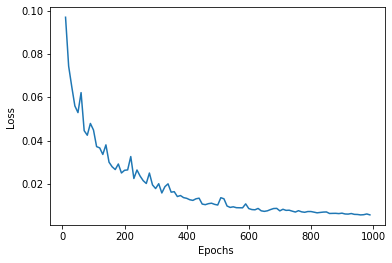

In [22]:
model = tf.keras.Model(all_inputs, output)
model.compile(optimizer = 'adam', loss = tf.keras.losses.MSE)

#epics = []
#for item in range(0,1000,10):
#    epics.append(item)
    
loss = []
epochs = []
last_epochs = 0
for item in range(10,1000,10):
    epochs.append(item)
    loss.append(avg_loss(test_ds,test,val_ds,item-last_epochs))
    last_epochs = item
plt.plot(epochs,loss)
plt.xlabel('Epochs ')
plt.ylabel('Loss ')

In [23]:
model.fit(train_ds, epochs= 800, validation_data=val_ds)

Epoch 1/800
4/4 [==============================] - 0s 9ms/step - loss: 2.2767e-04 - val_loss: 6.6138e-05
Epoch 2/800
4/4 [==============================] - 0s 8ms/step - loss: 1.9662e-04 - val_loss: 6.0620e-05
Epoch 3/800
4/4 [==============================] - 0s 8ms/step - loss: 2.3595e-04 - val_loss: 6.0448e-05
Epoch 4/800
4/4 [==============================] - 0s 8ms/step - loss: 2.2925e-04 - val_loss: 5.6194e-05
Epoch 5/800
4/4 [==============================] - 0s 8ms/step - loss: 2.2529e-04 - val_loss: 6.8230e-05
Epoch 6/800
4/4 [==============================] - 0s 8ms/step - loss: 2.2909e-04 - val_loss: 6.0333e-05
Epoch 7/800
4/4 [==============================] - 0s 8ms/step - loss: 2.4316e-04 - val_loss: 6.7435e-05
Epoch 8/800
4/4 [==============================] - 0s 7ms/step - loss: 2.0209e-04 - val_loss: 6.5925e-05
Epoch 9/800
4/4 [==============================] - 0s 7ms/step - loss: 2.0830e-04 - val_loss: 6.0403e-05
Epoch 10/800
4/4 [==============================] - 0s 

In [25]:
test_predictions = model.predict(test_ds)
true_values = list(test['Target'])


1/1 [==============================] - 0s 32ms/step


Text(0.5, 1.0, 'Ternary: Accuracy with all Atomic Properites')

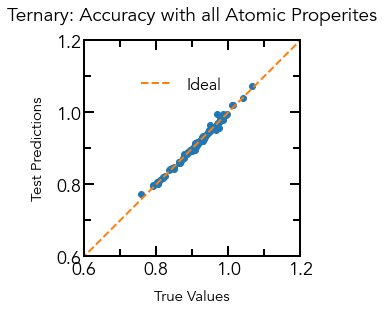

In [28]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])


ax.plot(true_values, test_predictions, 'o' )

ax.plot([i/10 for i in range(0,14)], [i/10 for i in range(0,14)], linewidth=2, label='Ideal', linestyle='dashed')



ax.set_xlim(.6, 1.2)
ax.set_ylim(.6, 1.2)



ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(.2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.set_xlabel('True Values', labelpad=10,fontsize = 15)
ax.set_ylabel('Test Predictions', labelpad=10,fontsize = 15)

ax.legend(bbox_to_anchor=(.7, .9), loc=1, frameon=False, fontsize=16)

#plt.title('Accuracy with Density Input' ,fontsize = 19)

ax.set_title('Ternary: Accuracy with all Atomic Properites', pad=20, fontsize = 19)



